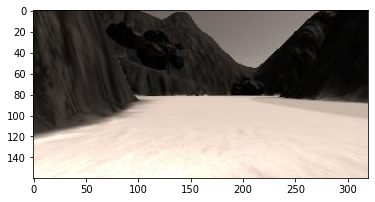

jpeg


In [49]:

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Uncomment the next line for use in a Jupyter notebook

# Define the filename, read and plot the image
filename = 'sample.jpg'

image = mpimg.imread(filename)

plt.imshow(image)
plt.show()


import imghdr
print(imghdr.what('sample.jpg'))

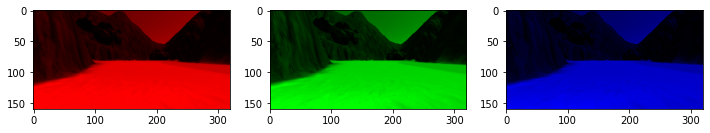

In [69]:
import numpy as np 

redChannel = np.copy(image)
redChannel[:, :, [1, 2]] = 0
greenChannel = np.copy(image)
greenChannel[:, :, [0, 2]] = 0
blueChannel = np.copy(image)
blueChannel[:, :, [0, 1]] = 0

fig = plt.figure(figsize=(12,3)) # Create a figure for plotting
plt.subplot(131)
plt.imshow(redChannel)
plt.subplot(132)
plt.imshow(greenChannel)
plt.subplot(133)
plt.imshow(blueChannel)


In [98]:
def colorThreshold(img, red_th, gre_th, blu_th):
    
    red = img[:,:,[0]]
    gre = img[:,:,[1]]
    blu = img[:,:,[2]]
    
    red_low_values_flags = red < red_th
    red_high_values_flags = red >= red_th

    gre_low_values_flags = gre < gre_th
    gre_high_values_flags = gre >= gre_th

    blu_low_values_flags = blu < blu_th
    blu_high_values_flags = blu >= blu_th


    red[red_low_values_flags] = 0
    red[red_high_values_flags] = 255

    gre[gre_low_values_flags] = 0
    gre[gre_high_values_flags] = 255

    blu[blu_low_values_flags] = 0
    blu[blu_high_values_flags] = 255
    

    image_th = np.concatenate((red, gre, blu), axis = 2)

    plt.imshow(image_th)
    plt.show()
    
    return image_th
    

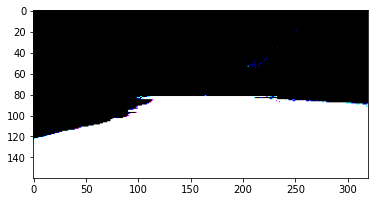

In [135]:
a = colorThreshold(image, 190, 174, 156)

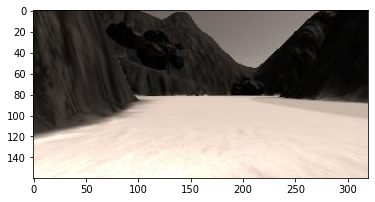

In [31]:

imageGrid = mpimg.imread('sample.jpg')
plt.imshow(imageGrid)
plt.show() 

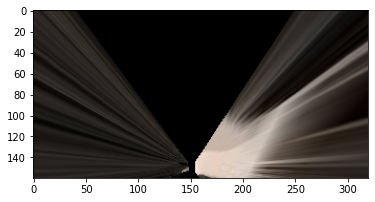

In [136]:
import numpy as np
import cv2


def transformImage(img, src, dst):
    transMatrix = cv2.getPerspectiveTransform(src, dst); '''Perspective Transformation Matrix'''
    warpedImage = cv2.warpPerspective( img, transMatrix, (img.shape[1], img.shape[0]) )
    return warpedImage

dst_size = 5
# Set a bottom offset to account for the fact that the bottom of the image 
# is not the position of the rover but a bit in front of it
bottom_offset = 6

sourcePoints = np.float32([[13.4819, 140.431], [118.643, 94.625], [199.288, 95.9153], [302.514, 141.077]])
destinationPoints = np.float32([[13.4819, 140.431], [13, 95], [300, 95.9153], [302.514, 141.077]])

destinationPoints = np.float32([[imageGrid.shape[1]/2 - dst_size, imageGrid.shape[0] - bottom_offset],
                      [imageGrid.shape[1]/2 + dst_size, imageGrid.shape[0] - bottom_offset],
                      [imageGrid.shape[1]/2 + dst_size, imageGrid.shape[0] - 2*dst_size - bottom_offset], 
                      [imageGrid.shape[1]/2 - dst_size, imageGrid.shape[0] - 2*dst_size - bottom_offset],
                      ])

warpedImage = transformImage(imageGrid, sourcePoints, destinationPoints)
plt.imshow(warpedImage)
plt.show()


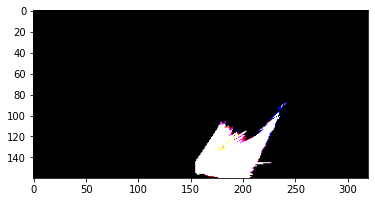

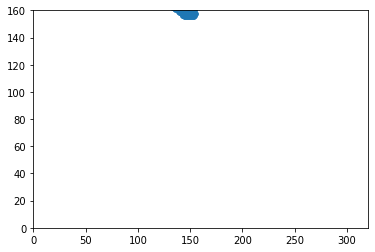

In [179]:
colorsel = colorThreshold(warpedImage, 186, 176, 164)

xpos, ypos, _ = colorsel.nonzero()
plt.plot(xpos, ypos, '.')
plt.xlim(0, 320)
plt.ylim(0, 160)
plt.show()


###### 

In [47]:
arr = np.array([[1,0],[2,3]])
print(arr.nonzero())
print(arr)

(array([0, 1, 1]), array([0, 0, 1]))
[[1 0]
 [2 3]]
